## Problem 7(XOR)

In [1]:
import pandas as pd

In [2]:
data7=pd.read_csv(r"C:\Users\harsh\Downloads\data (1)\demo_data\7.xor.csv",header=None)

In [3]:
data7.head()

,0,1,2
0,1.764052,0.400157,-1.0
1,0.978738,2.240893,-1.0
2,1.867558,-0.977278,1.0
3,0.950088,-0.151357,1.0
4,-0.103219,0.410599,1.0


In [4]:
data7[2].value_counts()

-1.0    260
 1.0    240
Name: 2, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data7[[0,1]],data7[2],test_size=0.15)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler7=StandardScaler()

In [7]:
data_rescaled=scaler7.fit_transform(X_train)

In [8]:
import tensorflow
import tensorflow.keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model7=Sequential()

In [9]:
model7.add(Dense(3,activation="relu",input_dim=2))
model7.add(Dense(2,activation="relu"))
model7.add(Dense(1,activation="sigmoid"))

In [10]:
model7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 9         
                                                                 
 dense_1 (Dense)             (None, 2)                 8         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [11]:
model7.compile(optimizer="adam",loss="binary_crossentropy")

In [12]:
X_train

,0,1
274,1.181379,-0.631904
328,-0.067276,-1.318396
187,0.049495,0.493837
227,0.338904,2.021044
286,0.037006,0.767902
...,...,...
476,1.401345,-0.410382
291,-1.139802,0.784958
162,-1.157355,-0.312292
39,-0.311553,0.056165


In [13]:
y_train

274    1.0
328   -1.0
187   -1.0
227   -1.0
286   -1.0
      ... 
476    1.0
291    1.0
162   -1.0
39     1.0
201   -1.0
Name: 2, Length: 425, dtype: float64

In [14]:
model7.fit(X_train,y_train,batch_size=10,epochs=30,verbose=1)

Epoch 1/30
43/43 [==============================] - 1s 840us/step - loss: 0.6833
Epoch 2/30
43/43 [==============================] - 0s 917us/step - loss: 0.6626
Epoch 3/30
43/43 [==============================] - 0s 810us/step - loss: 0.6428
Epoch 4/30
43/43 [==============================] - 0s 902us/step - loss: 0.6233
Epoch 5/30
43/43 [==============================] - 0s 867us/step - loss: 0.6048
Epoch 6/30
43/43 [==============================] - 0s 786us/step - loss: 0.5866
Epoch 7/30
43/43 [==============================] - 0s 762us/step - loss: 0.5693
Epoch 8/30
43/43 [==============================] - 0s 774us/step - loss: 0.5521
Epoch 9/30
43/43 [==============================] - 0s 762us/step - loss: 0.5357
Epoch 10/30
43/43 [==============================] - 0s 944us/step - loss: 0.5196
Epoch 11/30
43/43 [==============================] - 0s 881us/step - loss: 0.5039
Epoch 12/30
43/43 [==============================] - 0s 929us/step - loss: 0.4889
Epoch 13/30
43/43 [======

In [15]:
pred_=model7.predict(X_train)

14/14 [==============================] - 0s 616us/step


In [16]:
pred_

array([[0.27630982],
       [0.27630982],
       [0.27630982],
       [0.27630982],
       [0.27630982],
       [0.27630982],
       [0.27630982],
       [0.27630982],
       [0.27630982],
       [0.27630982],
       [0.27630982],
       [0.27630982],
       [0.27630982],
       [0.27630982],
       [0.27630982],
       [0.27630982],
       [0.27630982],
       [0.27630982],
       [0.27630982],
       [0.27630982],
       [0.27630982],
       [0.27630982],
       [0.27630982],
       [0.27630982],
       [0.27630982],
       [0.27630982],
       [0.27630982],
       [0.27630982],
       [0.27630982],
       [0.27630982],
       [0.27630982],
       [0.27630982],
       [0.27630982],
       [0.27630982],
       [0.27630982],
       [0.27630982],
       [0.27630982],
       [0.27630982],
       [0.27630982],
       [0.27630982],
       [0.27630982],
       [0.27630982],
       [0.27630982],
       [0.27630982],
       [0.27630982],
       [0.27630982],
       [0.27630982],
       [0.276

In [17]:
import numpy as np

In [18]:
pred_=np.ravel(np.where(pred_<0.5,-1,1))
pred_=pd.Series(pred_)
pred_.index=y_train.index
pred_

274   -1
328   -1
187   -1
227   -1
286   -1
      ..
476   -1
291   -1
162   -1
39    -1
201   -1
Length: 425, dtype: int32

<AxesSubplot:xlabel='0', ylabel='1'>

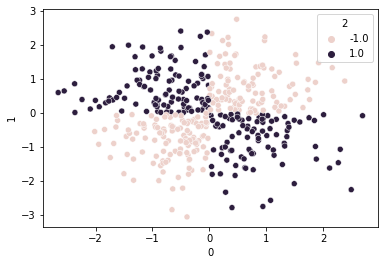

In [19]:
import seaborn as sns
sns.scatterplot(x=X_train[0],y=X_train[1],hue=y_train)

<AxesSubplot:xlabel='0', ylabel='1'>

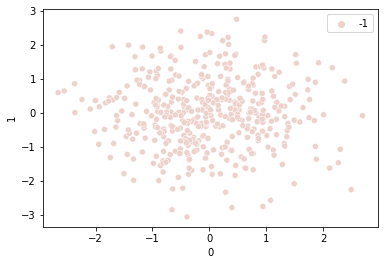

In [20]:
sns.scatterplot(x=X_train[0],y=X_train[1],hue=pred_)

In [21]:
from sklearn import metrics
metrics.accuracy_score(y_train,pred_)

0.5270588235294118

#### Using batch normalization and weights initialization

In [22]:
import tensorflow
import tensorflow.keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization
model7_=Sequential()

In [23]:
model7_.add(Dense(5,activation="relu",input_dim=2, kernel_initializer='he_uniform'))
model7_.add(Dense(3,activation="relu", kernel_initializer='he_uniform'))
model7_.add(BatchNormalization())
model7_.add(Dense(1,activation="sigmoid"))

In [24]:
model7_.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [25]:
model7_.fit(X_train,y_train,batch_size=10,epochs=200,verbose=1,validation_split=0.2)

Epoch 1/200
34/34 [==============================] - 1s 5ms/step - loss: 0.9984 - accuracy: 0.2353 - val_loss: 0.6547 - val_accuracy: 0.1412
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 0.8457 - accuracy: 0.2206 - val_loss: 0.6240 - val_accuracy: 0.1765
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 0.7434 - accuracy: 0.2235 - val_loss: 0.5685 - val_accuracy: 0.1647
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 0.6353 - accuracy: 0.1853 - val_loss: 0.5063 - val_accuracy: 0.0353
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 0.5228 - accuracy: 0.1559 - val_loss: 0.4305 - val_accuracy: 0.0471
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 0.3961 - accuracy: 0.1706 - val_loss: 0.3508 - val_accuracy: 0.0471
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 0.2644 - accuracy: 0.1588 - val_loss: 0.2776 - val_accuracy: 0.0471
Epoch 8/200
3

Epoch 58/200
34/34 [==============================] - 0s 2ms/step - loss: -15.1750 - accuracy: 0.2882 - val_loss: -12.6183 - val_accuracy: 0.3294
Epoch 59/200
34/34 [==============================] - 0s 2ms/step - loss: -15.3305 - accuracy: 0.2647 - val_loss: -13.0991 - val_accuracy: 0.2941
Epoch 60/200
34/34 [==============================] - 0s 2ms/step - loss: -15.8432 - accuracy: 0.2676 - val_loss: -13.5115 - val_accuracy: 0.3529
Epoch 61/200
34/34 [==============================] - 0s 2ms/step - loss: -16.2363 - accuracy: 0.2235 - val_loss: -13.9216 - val_accuracy: 0.2941
Epoch 62/200
34/34 [==============================] - 0s 2ms/step - loss: -15.8626 - accuracy: 0.2059 - val_loss: -14.4605 - val_accuracy: 0.3647
Epoch 63/200
34/34 [==============================] - 0s 2ms/step - loss: -17.4463 - accuracy: 0.2529 - val_loss: -14.7875 - val_accuracy: 0.3176
Epoch 64/200
34/34 [==============================] - 0s 2ms/step - loss: -17.8314 - accuracy: 0.2500 - val_loss: -15.4106 -

34/34 [==============================] - 0s 2ms/step - loss: -49.3112 - accuracy: 0.2176 - val_loss: -42.5057 - val_accuracy: 0.4118
Epoch 115/200
34/34 [==============================] - 0s 2ms/step - loss: -49.5372 - accuracy: 0.2500 - val_loss: -43.7101 - val_accuracy: 0.4000
Epoch 116/200
34/34 [==============================] - 0s 2ms/step - loss: -49.2319 - accuracy: 0.2500 - val_loss: -44.5838 - val_accuracy: 0.3882
Epoch 117/200
34/34 [==============================] - 0s 2ms/step - loss: -50.3125 - accuracy: 0.2176 - val_loss: -45.1123 - val_accuracy: 0.4118
Epoch 118/200
34/34 [==============================] - 0s 2ms/step - loss: -51.6238 - accuracy: 0.2294 - val_loss: -46.7303 - val_accuracy: 0.3765
Epoch 119/200
34/34 [==============================] - 0s 2ms/step - loss: -54.0905 - accuracy: 0.2500 - val_loss: -45.6797 - val_accuracy: 0.4353
Epoch 120/200
34/34 [==============================] - 0s 2ms/step - loss: -53.0365 - accuracy: 0.1941 - val_loss: -46.5097 - val_ac

Epoch 170/200
34/34 [==============================] - 0s 1ms/step - loss: -96.3342 - accuracy: 0.2382 - val_loss: -85.0696 - val_accuracy: 0.3647
Epoch 171/200
34/34 [==============================] - 0s 1ms/step - loss: -99.4397 - accuracy: 0.2471 - val_loss: -85.8141 - val_accuracy: 0.4235
Epoch 172/200
34/34 [==============================] - 0s 1ms/step - loss: -96.9191 - accuracy: 0.2118 - val_loss: -88.9298 - val_accuracy: 0.4000
Epoch 173/200
34/34 [==============================] - 0s 2ms/step - loss: -100.4116 - accuracy: 0.2324 - val_loss: -90.4699 - val_accuracy: 0.3647
Epoch 174/200
34/34 [==============================] - 0s 2ms/step - loss: -99.9110 - accuracy: 0.2147 - val_loss: -90.3451 - val_accuracy: 0.4000
Epoch 175/200
34/34 [==============================] - 0s 2ms/step - loss: -100.8708 - accuracy: 0.2029 - val_loss: -91.6877 - val_accuracy: 0.4235
Epoch 176/200
34/34 [==============================] - 0s 1ms/step - loss: -103.3712 - accuracy: 0.2000 - val_loss: 

In [26]:
pred7=model7_.predict(X_train)

14/14 [==============================] - 0s 693us/step


In [27]:
pred7

array([[9.99991953e-01],
       [0.00000000e+00],
       [3.14500763e-31],
       [0.00000000e+00],
       [1.91988522e-34],
       [0.00000000e+00],
       [9.99999821e-01],
       [9.99927938e-01],
       [1.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [8.06801260e-01],
       [0.00000000e+00],
       [9.74749506e-01],
       [9.99992967e-01],
       [9.99999762e-01],
       [9.99996126e-01],
       [9.99997377e-01],
       [9.83935416e-01],
       [0.00000000e+00],
       [0.00000000e+00],
       [9.99999940e-01],
       [0.00000000e+00],
       [9.99990761e-01],
       [9.93124191e-21],
       [0.00000000e+00],
       [0.00000000e+00],
       [9.99998331e-01],
       [9.99995232e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [8.09404347e-03],
       [9.99576509e-01],
       [0.00000000e+00],


In [28]:
pred7=np.ravel(np.where(pred7<0.5,-1,1))
pred7=pd.Series(pred7)
pred7.index=y_train.index
pred7

274    1
328   -1
187   -1
227   -1
286   -1
      ..
476    1
291    1
162   -1
39     1
201   -1
Length: 425, dtype: int32

In [29]:
from mlxtend.plotting import plot_decision_regions

3888/3888 [==============================] - 2s 565us/step


<AxesSubplot:>

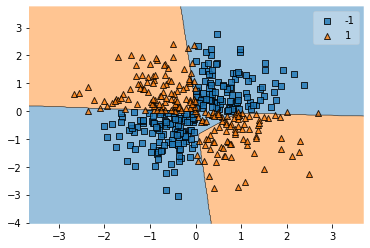

In [30]:
plot_decision_regions(X_train[[0,1]].values,y_train.values.astype(int),clf=model7_)

In [56]:
metrics.accuracy_score(y_train,pred7)

0.7905882352941176

<AxesSubplot:xlabel='0', ylabel='1'>

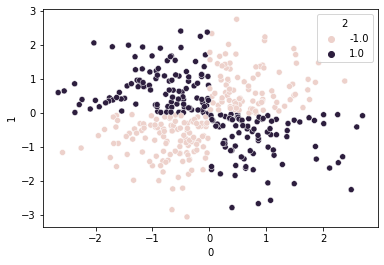

In [57]:
sns.scatterplot(x=X_train[0],y=X_train[1],hue=y_train)

<AxesSubplot:xlabel='0', ylabel='1'>

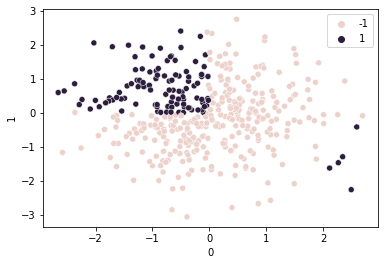

In [58]:
sns.scatterplot(x=X_train[0],y=X_train[1],hue=pred7)